<a href="https://colab.research.google.com/github/marciofag/py-analise-dados-vendas-sqlite3/blob/main/analise_dados_vendas_sqlite3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conectar ao banco de dados (ou criar)
conexao = sqlite3.connect('dados_vendas.db')
cursor = conexao.cursor()

# Criar tabela de vendas (caso ainda não exista)
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

In [5]:
# Inserir dados (somente se necessário, evitar duplicar)
cursor.execute('SELECT COUNT(*) FROM vendas1')
if cursor.fetchone()[0] == 0:
    cursor.execute('''
    INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
    ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
    ('2023-01-05', 'Produto B', 'Roupas', 350.00),
    ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
    ('2023-03-15', 'Produto D', 'Livros', 200.00),
    ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
    ('2023-04-02', 'Produto F', 'Roupas', 400.00),
    ('2023-05-05', 'Produto G', 'Livros', 150.00),
    ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
    ('2023-07-20', 'Produto I', 'Roupas', 600.00),
    ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
    ('2023-09-30', 'Produto K', 'Livros', 300.00),
    ('2023-10-05', 'Produto L', 'Roupas', 450.00),
    ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
    ('2023-12-20', 'Produto N', 'Livros', 250.00);
    ''')
    conexao.commit()

# Carregar os dados para um DataFrame
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

# Converter coluna de data
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

# Visualizar os dados
print(df_vendas)

    id_venda data_venda    produto    categoria  valor_venda
0          1 2023-01-01  Produto A  Eletrônicos       1500.0
1          2 2023-01-05  Produto B       Roupas        350.0
2          3 2023-02-10  Produto C  Eletrônicos       1200.0
3          4 2023-03-15  Produto D       Livros        200.0
4          5 2023-03-20  Produto E  Eletrônicos        800.0
5          6 2023-04-02  Produto F       Roupas        400.0
6          7 2023-05-05  Produto G       Livros        150.0
7          8 2023-06-10  Produto H  Eletrônicos       1000.0
8          9 2023-07-20  Produto I       Roupas        600.0
9         10 2023-08-25  Produto J  Eletrônicos        700.0
10        11 2023-09-30  Produto K       Livros        300.0
11        12 2023-10-05  Produto L       Roupas        450.0
12        13 2023-11-15  Produto M  Eletrônicos        900.0
13        14 2023-12-20  Produto N       Livros        250.0


In [6]:
# Total vendido por categoria
total_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()
print("\nTotal por categoria:\n", total_categoria)


Total por categoria:
      categoria  valor_venda
0  Eletrônicos       6100.0
1       Livros        900.0
2       Roupas       1800.0


In [7]:
# Vendas mensais
df_vendas['mes'] = df_vendas['data_venda'].dt.strftime('%Y-%m')
total_mensal = df_vendas.groupby('mes')['valor_venda'].sum().reset_index()
print("\nTotal por mês:\n", total_mensal)


Total por mês:
         mes  valor_venda
0   2023-01       1850.0
1   2023-02       1200.0
2   2023-03       1000.0
3   2023-04        400.0
4   2023-05        150.0
5   2023-06       1000.0
6   2023-07        600.0
7   2023-08        700.0
8   2023-09        300.0
9   2023-10        450.0
10  2023-11        900.0
11  2023-12        250.0


<ipython-input-8-ae0efa961c23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_categoria, x='categoria', y='valor_venda', palette='viridis')


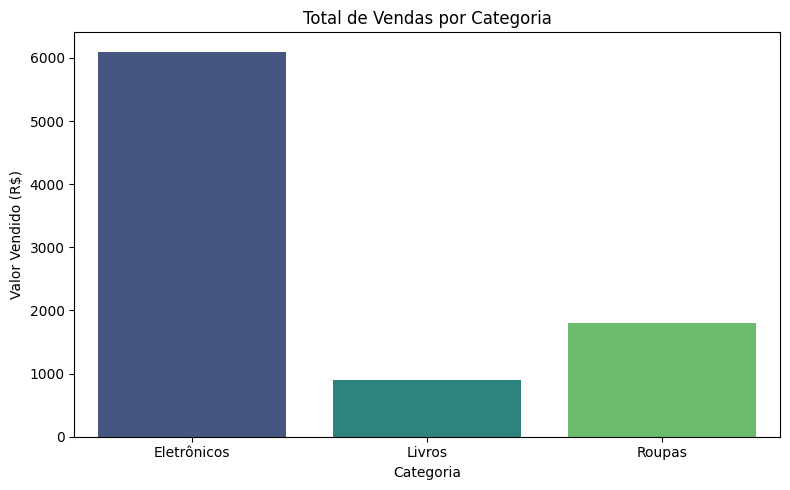

In [8]:
# Gráfico de barras - Vendas por categoria
plt.figure(figsize=(8,5))
sns.barplot(data=total_categoria, x='categoria', y='valor_venda', palette='viridis')
plt.title('Total de Vendas por Categoria')
plt.ylabel('Valor Vendido (R$)')
plt.xlabel('Categoria')
plt.tight_layout()
plt.show()

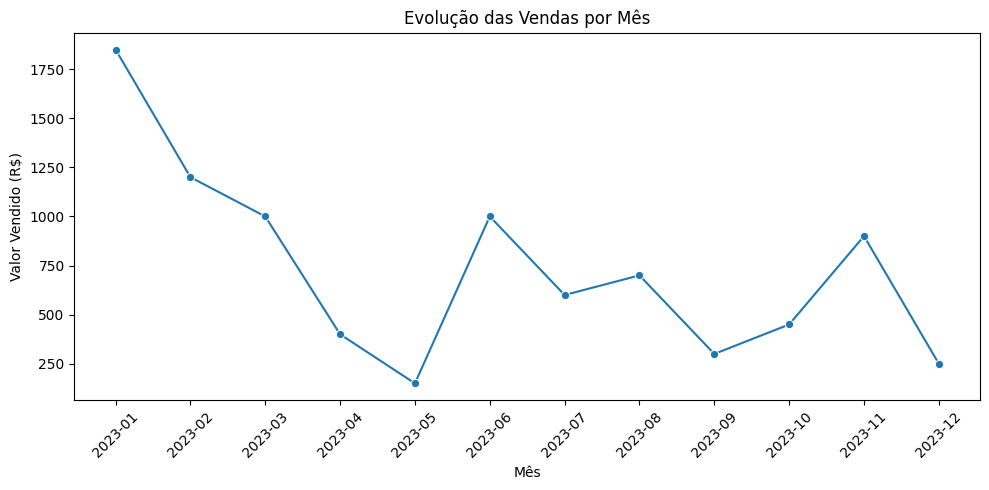

In [10]:
# Gráfico de linha - Vendas ao longo do ano
plt.figure(figsize=(10,5))
sns.lineplot(data=total_mensal, x='mes', y='valor_venda', marker='o')
plt.title('Evolução das Vendas por Mês')
plt.ylabel('Valor Vendido (R$)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Fechar a conexão com o banco de dados
conexao.close()
